The data was collected from mode analytics. It shows the crimes reported to San Francisco Police Department from Nov 1 2013 to Jan 31st 2014. For every crime that was reported the data includes:
1. The type of crime
2. When and where was the crime reported
3. How it was resolved.

When I was looking for interesting trends in the data I chanced upon two curious facts. 
1. Most of the petty larceny that is committed in SF peaks during the hours of 4 pm and 7 pm. I would have expected this peak to appear a little later in the day maybe after 9 pm. One possible theory to explain this is that during the months of November and January, daylight fades pretty quickly during this time of the day, and it is also the time that most of the office crowd in on the streets returning home. This could be why the petty larceny rate isn't as high as during 8 am to 10 am which is also the commuting hour.
2. Christmas seems to have an uplifting effect on the criminal class. There is a marked reduction in crime in the week leading up to christmas. And almost as if to make up for it they (the criminals) begin the new year with increased vigour. 

So given below are a few of the trends that I pulled out from the data. My conclusions below might be completely erroneous since all I have is three months worth of data. But statistics pulls out confident results with less :)

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
df_sf = pd.read_csv("sf_crime_report.csv", parse_dates=['date','time'], infer_datetime_format=True)
sing_colour = ['c']

## 1. Busiest day of the week
Lets see is there is any significant change in crime depending on the day of the week


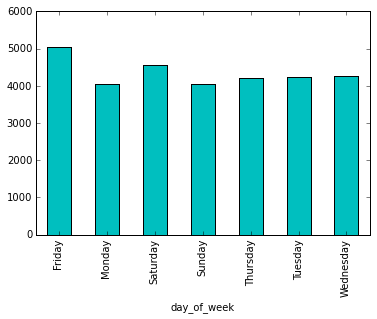

In [2]:
df_sf.groupby('day_of_week').size().plot(kind='bar',legend=False,color=sing_colour)

Though Fridays seem more busy than the rest of the week, it isn't significant enough for us to cancel evening plans in SF on Fridays.

##2. Most popular crime
Now lets see if there is a certain kind of crime in SF that is more prevalent than the rest.

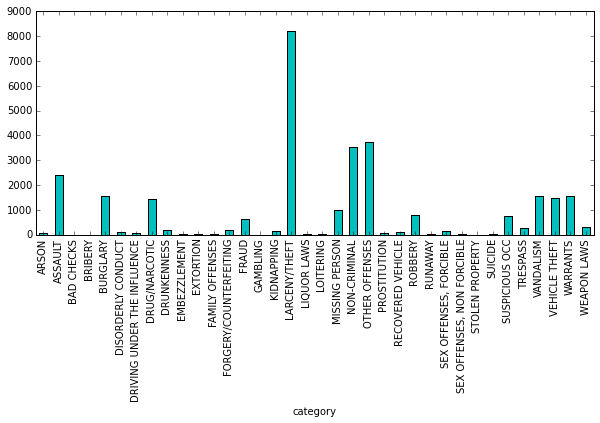

In [3]:
df_sf.groupby('category').size().plot(kind='bar', legend=False, color=sing_colour, figsize=(10,4))

Yeah, larceny which takes into account all sorts of petty as well as grand thefts is what plagues SF the most.

##3. How does SFPD resolve these crimes?
So how effective is SFPD in dealing with these compalints?

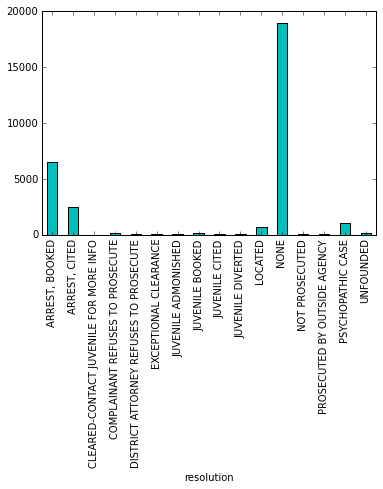

In [4]:
df_sf.groupby('resolution').size().plot(kind='bar', legend=False,color=sing_colour)

So a staggering amount of the complaints that SFPD recieves goes unresolved. Let's look at the next section to see what kind of crime the SFPD fails to resolve the most.

##4. What kind of crimes go unresolved the most?


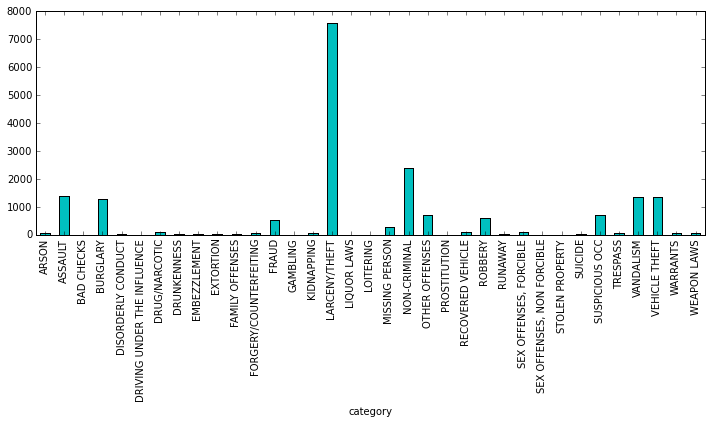

In [5]:
df_unreolved = df_sf[df_sf.resolution=='NONE']
df_unreolved.groupby('category').size().plot(kind='bar',color=sing_colour, figsize=(12,4))

So the SFPD's failure to resolve a huge amount of the claims now begins to make sense. The mundane crime is always hard to resolve.

##5. Which police district is most crime ridden?
SF has 10 police districts. Let's now see what the distribution of crime is among those districts.

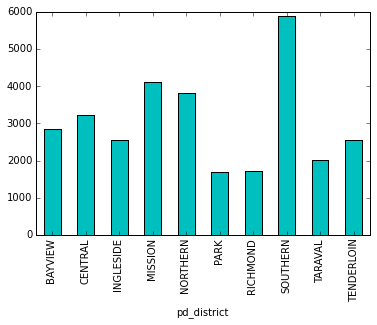

In [6]:
df_sf.groupby('pd_district').size().plot(kind='bar',color=sing_colour)

The southern district emerges as the clear winner and the park district is the laggard. 

##6. Let's dig a little deeper into the distribution of crimes in these districts.
Let's compare the distribution of crime between the most crime ridden and least crime ridden district

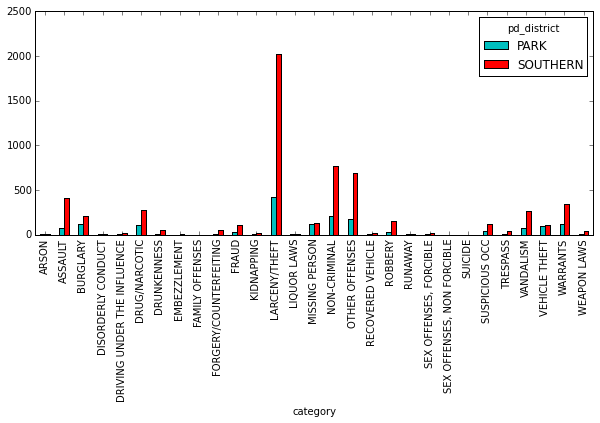

In [7]:
df_southern = df_sf[(df_sf.pd_district=='SOUTHERN') | (df_sf.pd_district=='PARK')]
df_southern = df_southern[['category', 'pd_district']]
colours = ['c', 'r']
df_southern.groupby([df_southern.pd_district, df_southern.category]).size().unstack(0).plot(kind='bar',color=colours, figsize=(10,4))

The park district seems to be a much better place to live in by all accounts.

##7. How are missing person cases resolved?

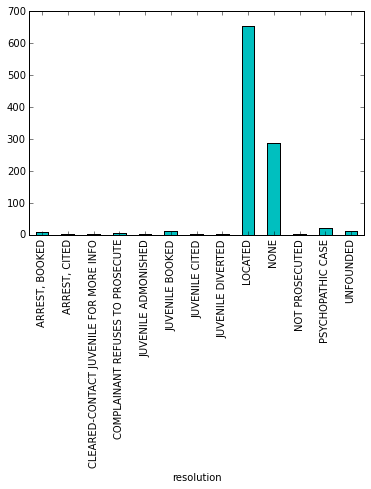

In [8]:
df_missing = df_sf[df_sf.category=='MISSING PERSON']
df_missing.groupby('resolution').size().plot(kind='bar',color=sing_colour)

This is a bit troubling, about 300 people went missing in three months.

##8. Does the christmas spirit influence the criminal class?
For this let's see what the crime distribution is on Nov 25, Dec 25 and Jan 25

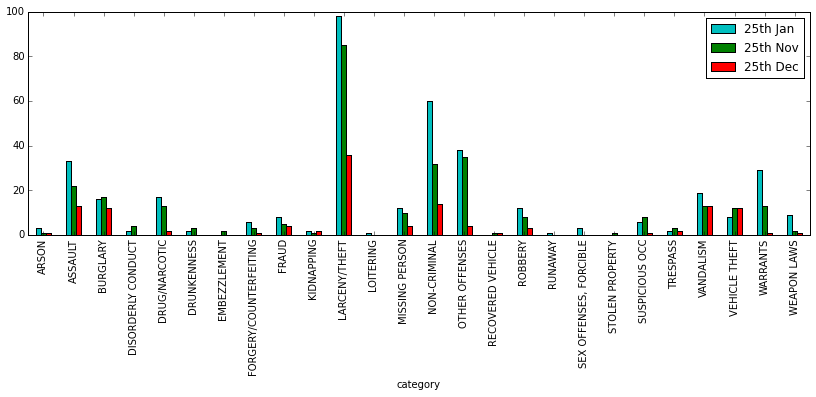

In [9]:
df_24th_day_of_month = df_sf[df_sf.date.dt.day == 25]
df_24th_day_of_month = df_24th_day_of_month[['category', 'date']]
df_24th_day_of_month.columns = ['category', 'twenty_fifth']
df_24th_day_of_month = df_24th_day_of_month.groupby([df_24th_day_of_month.twenty_fifth.dt.month, df_24th_day_of_month.category]).count()
colours = ['c', 'g','r']
plt = df_24th_day_of_month.unstack(0).plot(kind='bar',color=colours, figsize=(14, 4))
lines, labels = plt.get_legend_handles_labels()
plt.legend(['25th Jan', '25th Nov', '25th Dec'])

So criminals do want to be good on Christmas at least. Now let's ask the same question for crime resolution.

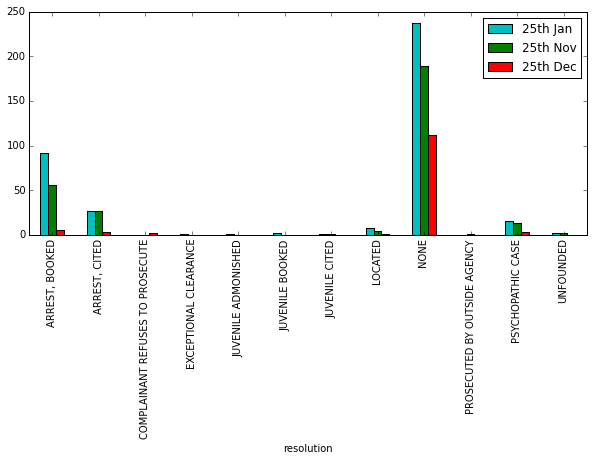

In [10]:
df_24th_day_of_month = df_sf[df_sf.date.dt.day == 25]
df_24th_day_of_month = df_24th_day_of_month[['resolution', 'date']]
df_24th_day_of_month = df_24th_day_of_month.groupby([df_24th_day_of_month.date.dt.month, df_24th_day_of_month.resolution]).count()
plt = df_24th_day_of_month.unstack(0).plot(kind='bar',color=colours, figsize=(10,4))
lines, labels = plt.get_legend_handles_labels()
plt.legend(['25th Jan', '25th Nov', '25th Dec'], loc='best')

Can't really conclude anything from this since crime is low on Christmas anyway.
Now let's look at number of crimes committed each week.

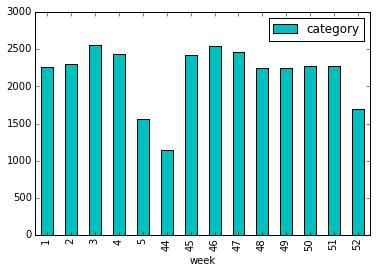

In [11]:
df_crime_by_Week = df_sf
df_crime_by_Week['week'] = df_sf.date.dt.week
df_crime_by_Week = df_crime_by_Week.sort('date', ascending=True)[['category', 'week']]
df_crime_by_Week.groupby(['week']).count().plot(kind='bar',color=sing_colour)

Week 44 and Week 5 are the extremes ends of this dataset and as such they may not contain all the data that they could have.

So looking at this the week of christmas is still the week with lowest incidents of reported crime

Let's look at the crime wave between Dec 23nd and Dec 29th i.e. the week of christmas

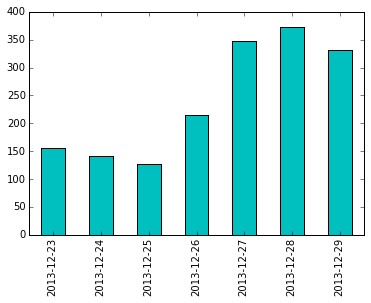

In [12]:
df_xmas_week = df_sf[df_sf.date.dt.week == 52]
df_xmas_week.groupby(df_xmas_week.date.dt.date).size().plot(kind='bar',color=sing_colour)

##9. Is there a week when the SFPD was more active?

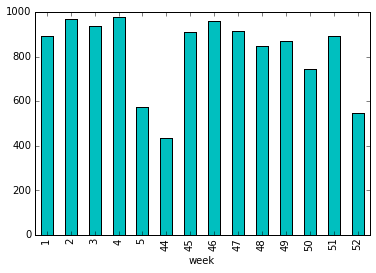

In [13]:
df_resolution = df_sf[['resolution', 'date']]
df_resolution = df_resolution[df_resolution.resolution != 'NONE'].sort('date')
df_resolution['week'] = df_resolution.date.dt.week
df_resolution.groupby(df_resolution.week).size().plot(kind='bar',color=sing_colour)

Week 52 doesn't count since it had pretty crime rates in general.

##10. Does christmas have any special effect on the districts?

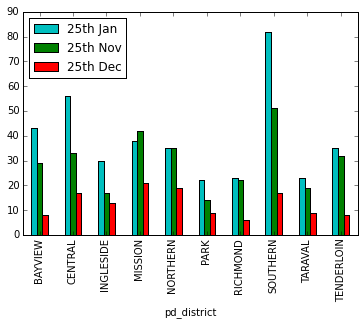

In [14]:

df_24th_day_of_month = df_sf[df_sf.date.dt.day == 25]
df_24th_day_of_month = df_24th_day_of_month[['category', 'date','pd_district']]
df_24th_day_of_month = df_24th_day_of_month.groupby([df_24th_day_of_month.pd_district,df_24th_day_of_month.date.dt.month]).count()
plt = df_24th_day_of_month.drop('date',axis=1).unstack(1).plot(kind='bar',color=colours)
lines, labels = plt.get_legend_handles_labels()
plt.legend(['25th Jan', '25th Nov', '25th Dec'],loc='best')


It would appear that the Southern district feels more festive than the others. Mission and Northern have more crimes
in Christmas than Southern. On other days Southern leaves the competition far behind.
Could there be a lot of welfare programs in the southern region?

##11. During a 24 hour period when is the most crime reported to have occured?

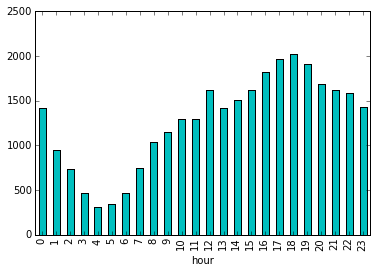

In [15]:

df_hourly = df_sf
df_hourly['hour'] = df_sf.time.dt.hour
df_hourly.groupby('hour').size().plot(kind='bar',color=sing_colour)

Perhaps number of crimes committed is directly proportional to the number of people who are out on the
street. Add to that the hour between 4pm to 7pm is when sunlight diminishes. Maybe that has an effect?

Let's see the distribution of petty larceny during the day

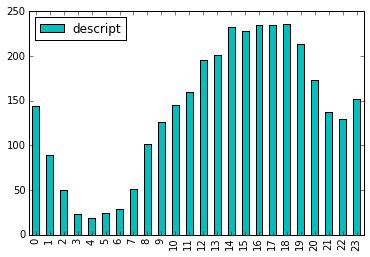

In [16]:
df_larceny = df_sf
df_larceny['hour'] = df_sf.time.dt.hour
df_larceny = df_sf[df_sf.category.str.contains('LARCENY') & df_sf.descript.str.contains('PETTY')]
df_larceny = df_larceny[['descript','hour','time']]
df_larceny = df_larceny.groupby('hour').count().reset_index()
df_larceny.drop(['time','hour'], axis=1).plot(kind='bar',color=sing_colour)

The wee hours of the morning are going to be the quitest since there are so few people on the streets to rob.
Now let's see at which hour vehicles get stolen 

/Users/prnbs/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


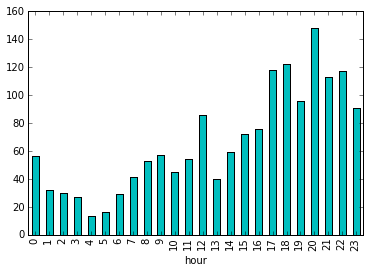

In [25]:
df_assault = df_sf[df_sf.category.str.contains('VEHICLE')]
df_assault['hour'] = df_sf.time.dt.hour
df_assault = df_assault[['hour']]
df_assault.groupby('hour').size().plot(kind='bar',color=sing_colour)

The data seems to suggest that most cars are stolen when people of SF are out having dinner. This could be substantiated by identifying the regions where cars get stolen the most.

##12. Let's see the top 10 most crime ridden addresses.

In [26]:
df_address = df_sf.groupby('address').count().reset_index()
df_address = df_address[['address', 'category']]
df_address = df_address.sort('category', ascending=False).head(10)
df_address

,address,category
5335,800 Block of BRYANT ST,705
5408,800 Block of MARKET ST,400
1203,1000 Block of POTRERO AV,188
2049,16TH ST / MISSION ST,154
982,100 Block of OFARRELL ST,140
605,0 Block of TURK ST,126
2806,2000 Block of MISSION ST,124
1178,1000 Block of MARKET ST,122
2803,2000 Block of MARKET ST,108
5557,900 Block of MARKET ST,105


## Let's look at the locations from where vehicles have been stolen between 8 pm and 9 pm

In [2]:
from IPython.core.display import HTML
HTML('<iframe src=https://raw.githubusercontent.com/Prnbs/SlideRule/master/DataStory/html/vehicles_8pm.html width=900 height=450></iframe>')